In [4]:
import os
os.environ['SPOTIPY_CLIENT_ID'] = '0dd677ab735f4fd1b9dbf6b236350ba1'
os.environ['SPOTIPY_CLIENT_SECRET'] = 'bbe8736a14ba4e64bfb2d4103c8957aa'
os.environ['SPOTIPY_REDIRECT_URI'] = 'http://google.com/'

In [1]:
from OOSpotify import *

In [6]:
a = Artist('kanye west')

In [12]:
a.getLatestAlbum().artists

[{'external_urls': {'spotify': 'https://open.spotify.com/artist/2hPgGN4uhvXAxiXQBIXOmE'},
  'href': 'https://api.spotify.com/v1/artists/2hPgGN4uhvXAxiXQBIXOmE',
  'id': '2hPgGN4uhvXAxiXQBIXOmE',
  'name': 'KIDS SEE GHOSTS',
  'type': 'artist',
  'uri': 'spotify:artist:2hPgGN4uhvXAxiXQBIXOmE'},
 {'external_urls': {'spotify': 'https://open.spotify.com/artist/5K4W6rqBFWDnAN6FQUkS6x'},
  'href': 'https://api.spotify.com/v1/artists/5K4W6rqBFWDnAN6FQUkS6x',
  'id': '5K4W6rqBFWDnAN6FQUkS6x',
  'name': 'Kanye West',
  'type': 'artist',
  'uri': 'spotify:artist:5K4W6rqBFWDnAN6FQUkS6x'},
 {'external_urls': {'spotify': 'https://open.spotify.com/artist/0fA0VVWsXO9YnASrzqfmYu'},
  'href': 'https://api.spotify.com/v1/artists/0fA0VVWsXO9YnASrzqfmYu',
  'id': '0fA0VVWsXO9YnASrzqfmYu',
  'name': 'Kid Cudi',
  'type': 'artist',
  'uri': 'spotify:artist:0fA0VVWsXO9YnASrzqfmYu'}]

In [ ]:
[(a,getattr(b[0],a)) for a in b[0]._getAttributes()]

In [ ]:
[(a,getattr(b[1],a)) for a in b[1]._getAttributes()]

In [ ]:
################################################################
# Simple Functions
def getPlaylists(userID):
    sp = getSpotifyCreds(user,scope)
    playlists = sp.user_playlists(userID)['items']
    return playlists,sp
#def findPlaylistID(userID,playlistName):
#    playlists = getPlaylists(userID)
#    return [playlist['id'] for playlist in playlists if playlist['name'] == playlistName][0]

def createPlaylist(userID,playlistName):
    playlists,sp = getPlaylists(userID)
    for playlist in playlists:
        if playlist['name'] == playlistName:
            ans = input('Playlist with this name already exists. Do you want to overwrite it?')
            if ans == 'y':
                sp.user_playlist_replace_tracks(userID,playlist['id'],tracks=[])
            else:
                print('Exiting...')
                sys.exit()
            return playlist['id']
    sp.user_playlist_create(userID,playlistName)  

def addTracksToPlaylist(userID,playlistID,trackIDs):
    sp = getSpotifyCreds(user,scope)
    sp.user_playlist_add_tracks(userID,playlistID,trackIDs)

#Creates a dictionary of dictionaries for each artist
def getArtists(artists):
    artistDict = {}
    for artist in artists:
        a = Artist(artist)
        artistDict[a.name.replace(' ','_')] = a
    return artistDict          
#################################################################            
# Less Simple Funcions
    
def createPlaylistFromTopTracks(artists,userID,playlistName=None,reqs=None):
    if not playlistName:
        playlistName = ' + '.join(artists)
    playlistID = createPlaylist(userID,playlistName)
    
    trackIDs = []
    for artist in artists:
        a = Artist(artist)
        trackIDs += [i.id for i in a.getTopTracks()]
        print('Top Tracks for {}:'.format(a.name))
        a.TopTracks()
        print()
    shuffle(trackIDs)

    addTracksToPlaylist(userID,playlistID,trackIDs)

def satisfyReqs(trackObj,reqs=None):
    if reqs:
        perf = []
        for key,val in reqs.items():
            perf.append(eval('{}{}{}'.format(getattr(trackObj,key),val[0],val[1])))
        return all(perf)
    else:
        return True

def createRadioPlaylist(artists,userID,playlistName=None,reqs=None):
    if not playlistName:
        playlistName= ' x '.join(artists)+' Radio'
    playlistID = createPlaylist(userID,playlistName)
    
    trackIDs = []
    reccArtists = []
    for artist in artists:
        a = Artist(artist)
        reccArtists += a.getRelatedArtists()[0:5] # Big toggle here
        tracks = [i for i in a.getTopTracks() if satisfyReqs(i,reqs)]
        #print([(i.name,i.tempo,i.artists[0]['name']) for i in tracks])
        trackIDs += [i.id for i in tracks]
    shuffle(reccArtists)
    #print([i.name for i in reccArtists])
    for a in reccArtists:
        if len(trackIDs)<30:
            tracks = [i for i in a.getTopTracks() if satisfyReqs(i,reqs)]
            #print([(i.name,i.tempo,i.artists[0]['name']) for i in tracks])
            trackIDs += [i.id for i in tracks]
        else:
            break
    #print(len(trackIDs))
    shuffle(trackIDs)
    
    addTracksToPlaylist(userID,playlistID,trackIDs)
        
def createPlaylistFromAlbumSpecs(artists):
    pass

def createPlaylistFromProducers(producers):
    pass
    #Suggestion from Katie -> need to find how to get this info
    
    #add in restriction for 'albums
    

In [ ]:
createRadioPlaylist(['Chance the rapper','Vulfpeck'],user)

Source: http://docs.echonest.com.s3-website-us-east-1.amazonaws.com/_static/AnalyzeDocumentation.pdf

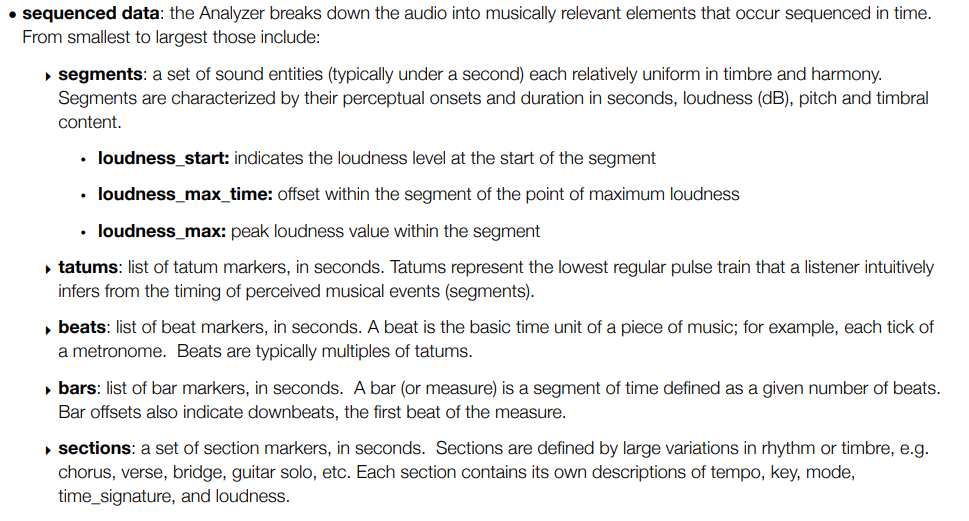

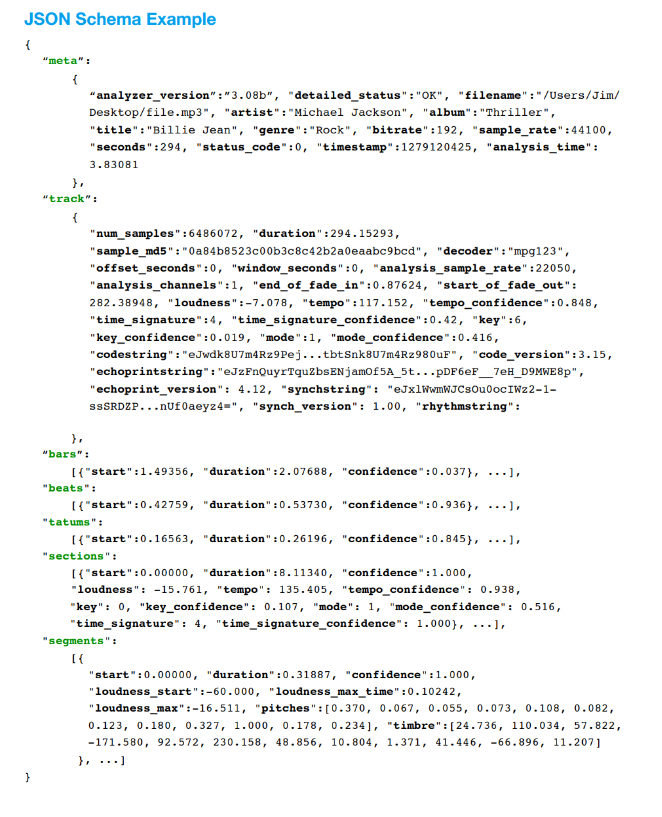

source: https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/

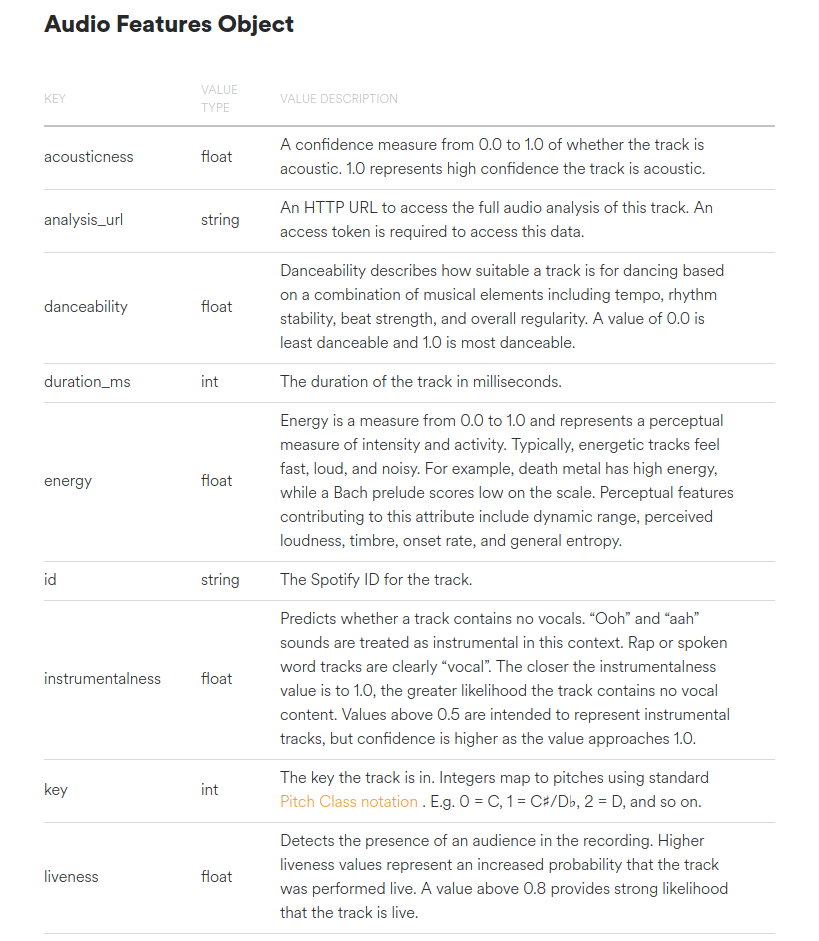

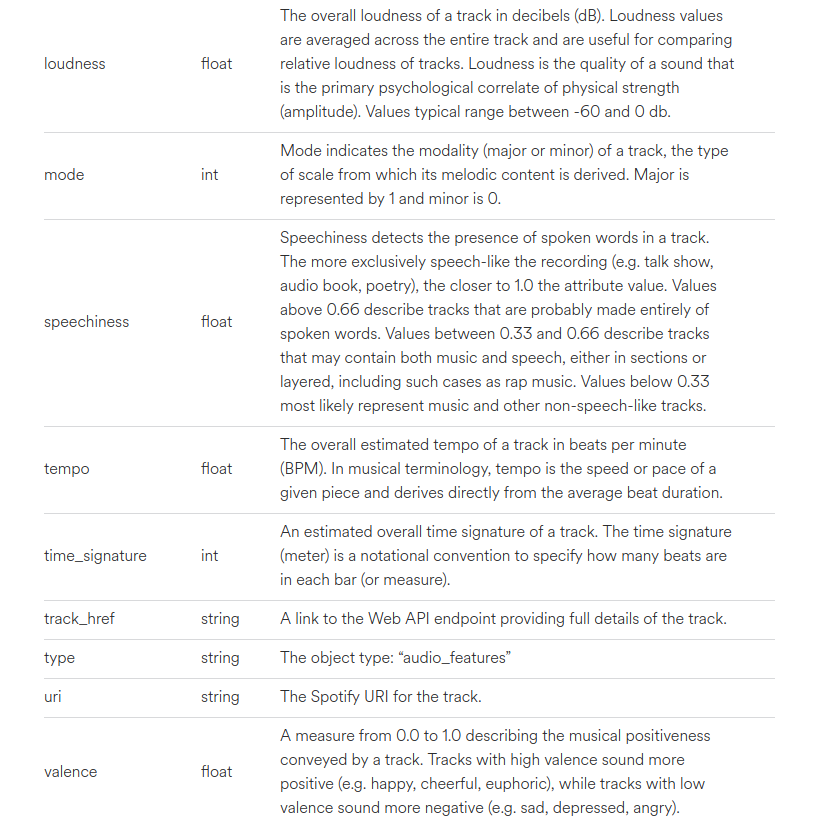

In [2]:
import muZ

In [5]:
df = muZ.featureComp([Artist('kanye'),Artist('Sam smith'),Artist('vulfpeck'),Artist('jack johnson')])

In [15]:
df.index.tolist()

ValueError: scatter requires x column to be numeric

In [16]:
df.reset_index()

,index,Kanye West,Sam Smith,Vulfpeck,Jack Johnson
0,acousticness,2.134780e-01,0.605100,0.302507,0.545000
1,danceability,6.915000e-01,0.536700,0.712600,0.770200
2,energy,5.388000e-01,0.369200,0.542600,0.468300
3,instrumentalness,1.880000e-07,0.000038,0.162905,0.006619
4,key,4.600000e+00,4.100000,4.300000,6.200000
5,liveness,1.837100e-01,0.148010,0.172280,0.121350
6,loudness,-6.012600e+00,-8.162400,-9.545400,-8.991600
7,mode,3.000000e-01,0.900000,0.800000,0.800000
8,speechiness,2.957200e-01,0.044550,0.111070,0.058510
9,tempo,1.144757e+02,108.163200,105.920800,115.660900


In [19]:
df.reset_index().plot.scatter(x=df.columns.tolist(),y='index')

ValueError: scatter requires y column to be numeric

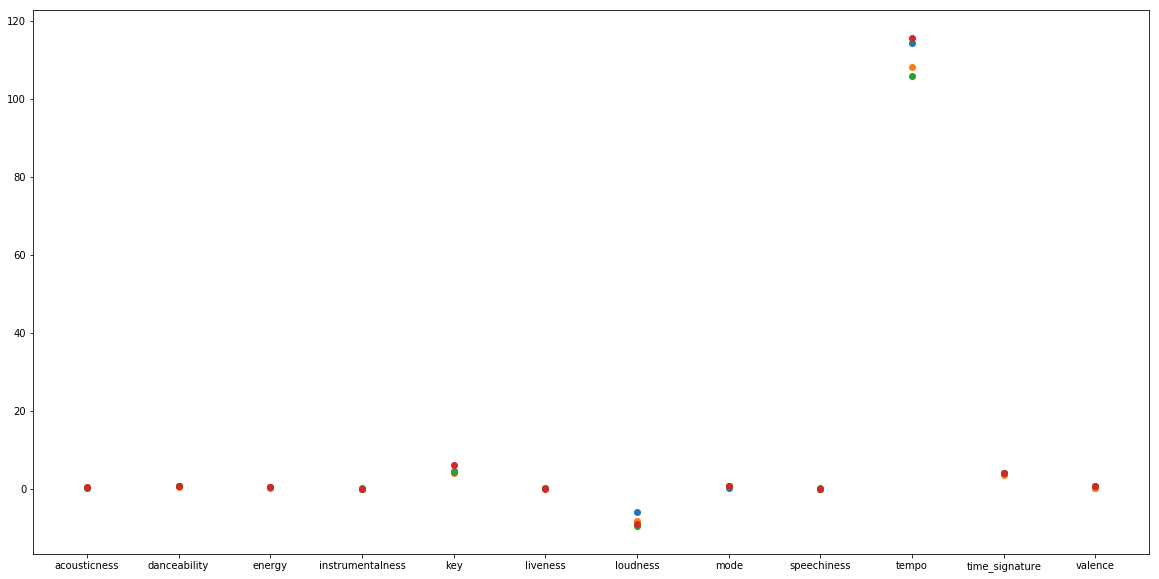

In [30]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
for name in df.columns.tolist():
    plt.scatter(df.reset_index()['index'],df[name])
#plt.scatter(df.reset_index()['index'],df['Jack Johnson'])

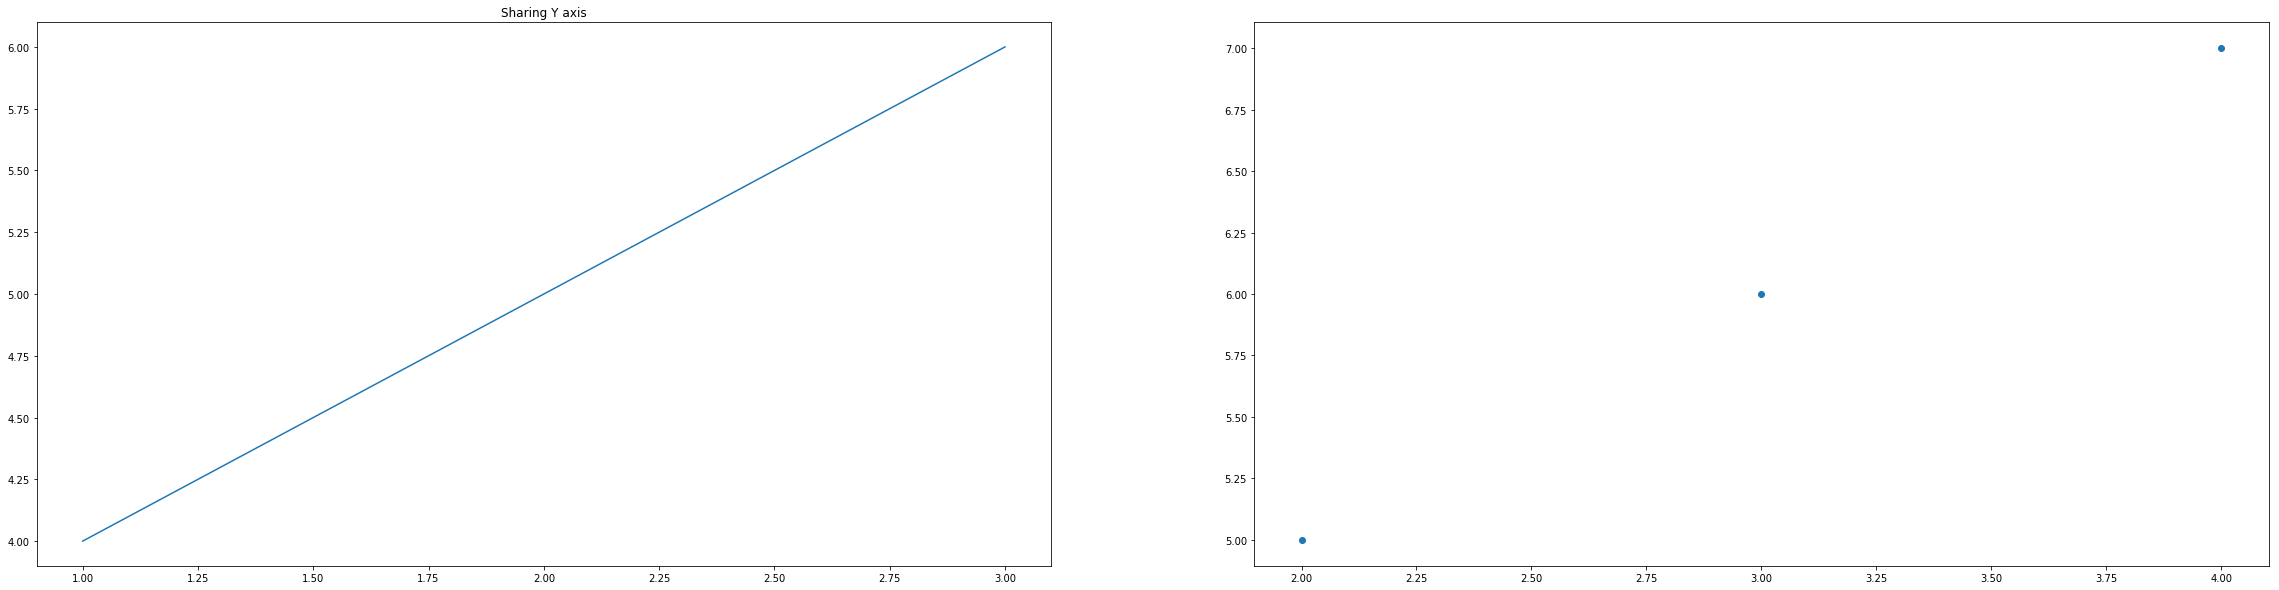

In [37]:
f, (ax1, ax2) = plt.subplots(1, 2,figsize=(40,10))
ax1.plot([1,2,3], [4,5,6])
ax1.set_title('Sharing Y axis')
ax2.scatter([2,3,4], [5,6,7])

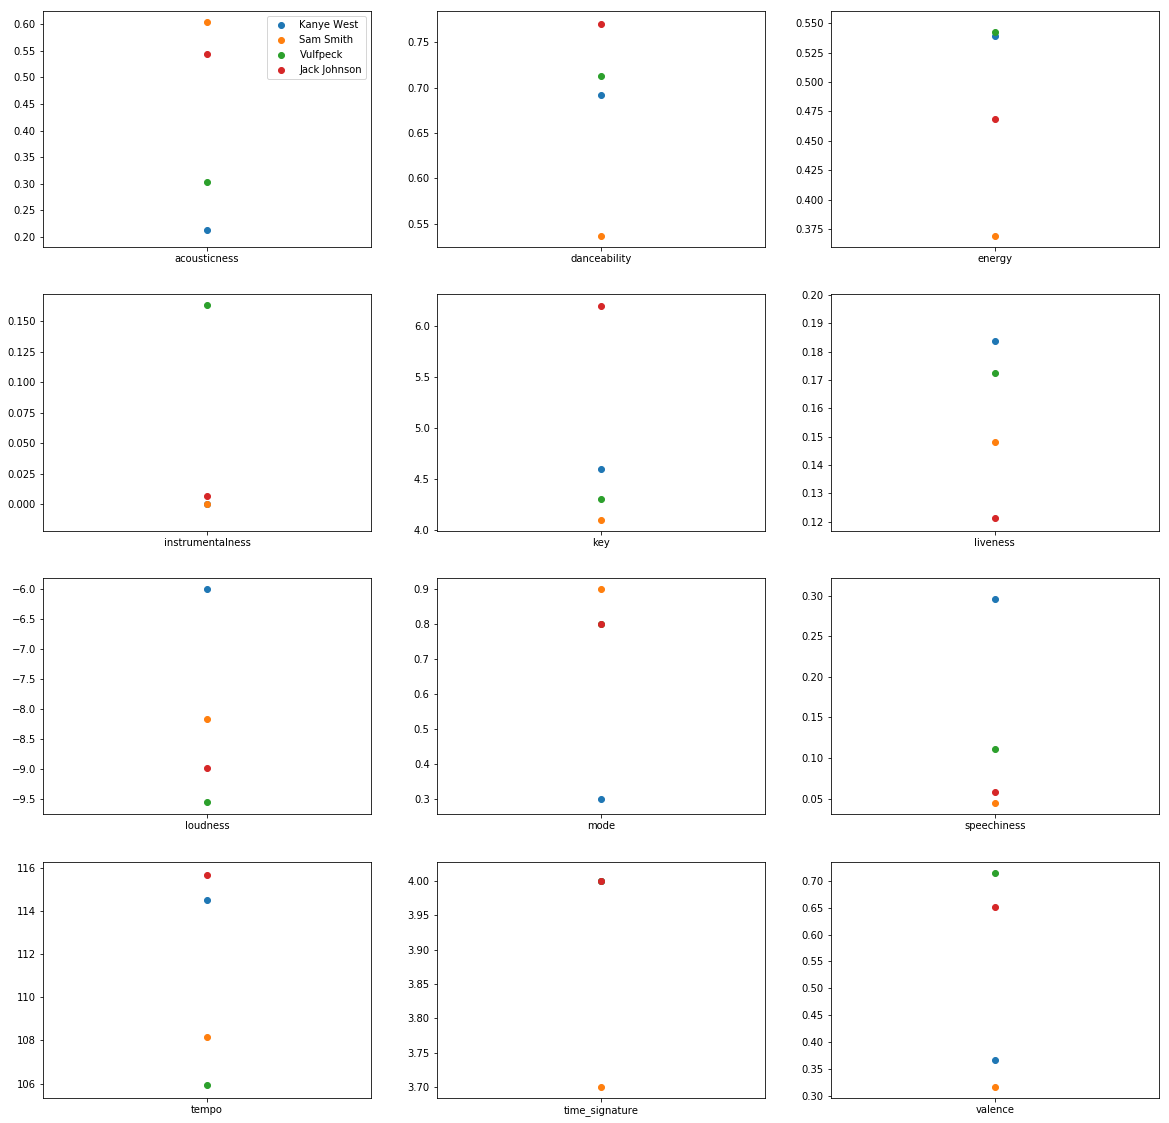

In [66]:
import matplotlib.pyplot as plt
f,([ax1,ax2,ax3],[ax4,ax5,ax6],[ax7,ax8,ax9],[ax10,ax11,ax12]) = plt.subplots(4,3,figsize=(20,20))
for i,a in enumerate([ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10,ax11,ax12]):
    for name in df.columns.tolist():
        if i==0:
            a.scatter(df.reset_index()['index'][i],df[name][i],label=name)
            handles,labels = a.get_legend_handles_labels()
        else:
            a.scatter(df.reset_index()['index'][i],df[name][i])
ax1.legend()

In [39]:
df.reset_index()['index'][0]

'acousticness'

In [54]:
df['Vulfpeck'][:3]

acousticness    0.302507
danceability    0.712600
energy          0.542600
Name: Vulfpeck, dtype: float64

In [67]:
df2 = muZ.featureComp([Track('sitting,waiting,wishing'),Track('tesselate')])

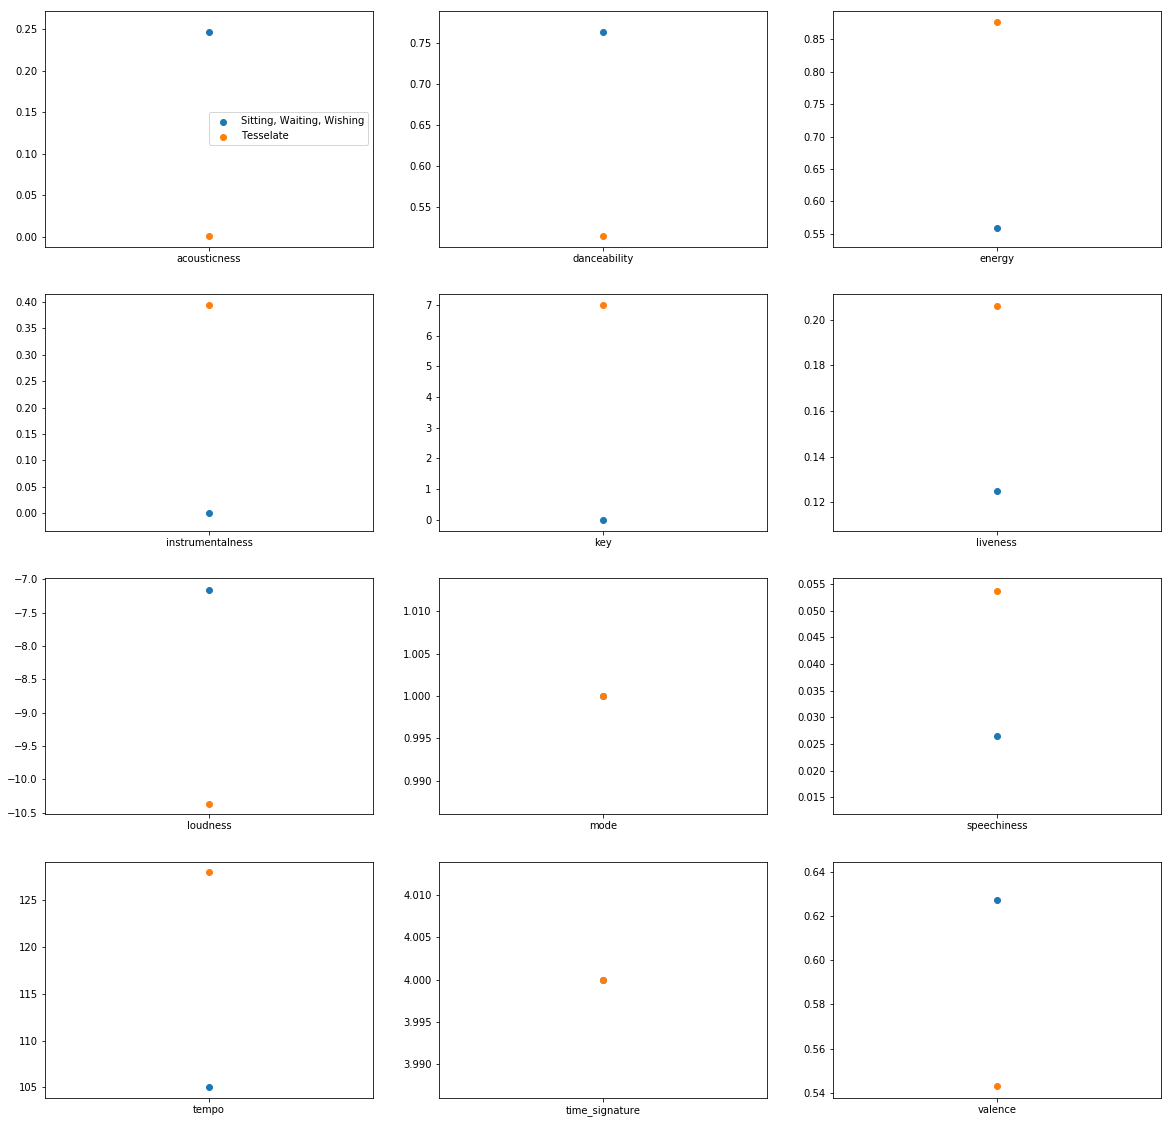

In [68]:
import matplotlib.pyplot as plt
f,([ax1,ax2,ax3],[ax4,ax5,ax6],[ax7,ax8,ax9],[ax10,ax11,ax12]) = plt.subplots(4,3,figsize=(20,20))
for i,a in enumerate([ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10,ax11,ax12]):
    for name in df2.columns.tolist():
        if i==0:
            a.scatter(df.reset_index()['index'][i],df2[name][i],label=name)
            handles,labels = a.get_legend_handles_labels()
        else:
            a.scatter(df2.reset_index()['index'][i],df2[name][i])
ax1.legend()

In [5]:
Playlist('united states top 50').Tracks()

AttributeError: 'Playlist' object has no attribute 'ownerid'

In [6]:
sp = getSpotifyCreds(me,scope)

In [97]:
User('spotify').Playlists()

0: Today's Top Hits
1: RapCaviar
2: mint
3: Are & Be
4: Rock This
5: Hot Country
6: ¡Viva Latino!
7: New Music Friday
8: Afternoon Acoustic
9: Peaceful Piano
10: Roots Rising
11: Lost In Austin: Country Music from SXSW
12: SXSW: HipHopUpNext
13: New Music Friday
14: Music Inspired By Mogul
15: SXSW 2017: Daily Guide
16: TGIF
17: SXSW UK Rising
18: Women of Experimental
19: The Refugee Playlist
20: This Is: Jason Isbell
21: This Is Disney
22: This Is The Doors
23: This Is AC/DC
24: This Is Adele
25: This Is Al Green
26: This Is alt-J
27: This Is: Aqua
28: This Is Aretha Franklin
29: This Is Bee Gees
30: This Is blink-182
31: This is: Bronzeville
32: This Is Bruno Mars
33: This is: Carole King
34: This is: Deep Purple
35: This Is Depeche Mode
36: This Is: Dispatch
37: This Is Ed Sheeran
38: This Is Future
39: This Is: George Michael
40: This Is: Gillian Welch
41: This Is James Arthur
42: This is: Jamiroquai
43: This Is John Mayer
44: This Is: John Legend
45: This Is Justin Bieber
46: Thi

In [103]:
User('spotify').getPlaylists()[356].Tracks()

retrying ...3secs
retrying ...2secs
retrying ...2secs
retrying ...2secs
0. Intro (The Meaning Of Life) -- Monty Python
1. Fish (Morning) -- Monty Python
2. The Meaning Of Life -- Monty Python
3. (Part One) The Miracle Of Birth -- Monty Python
4. MP Link -- Monty Python
5. (Part Two) The Third World (Yorkshire) -- Monty Python
6. Every Sperm Is Sacred -- Monty Python
7. Bloody Catholics -- Monty Python
8. Link (Martin Luther) -- Monty Python
9. (Part Three) Growth And Learning -- Monty Python
10. (Part Four) Fighting Each Other -- Monty Python
11. Terry Gilliam Introduction -- Monty Python
12. Accountancy Shanty -- Monty Python
13. (Part Five) Live Organ Transplants (Galaxy Song) -- Monty Python
14. (Part Six) The Autumn Years (The Not Noel Coward Song) -- Monty Python
15. (Part Seven) Death (Christmas In Heaven) -- Monty Python
16. MP Link (Dedication To Fish) -- Monty Python
17. Intro Title Song Demo Meaning Of Life - Piano Version -- Monty Python
18. Alternate Intro Title Song Meanin

In [37]:
sp.category_playlists(category_id='toplists')['playlists']['items']

[{'collaborative': False,
  'external_urls': {'spotify': 'https://open.spotify.com/user/spotify/playlist/37i9dQZF1DX5BAPG29mHS8'},
  'href': 'https://api.spotify.com/v1/users/spotify/playlists/37i9dQZF1DX5BAPG29mHS8',
  'id': '37i9dQZF1DX5BAPG29mHS8',
  'images': [{'height': 300,
    'url': 'https://i.scdn.co/image/fc774f0d24d64d71d11a7b4a03df17e751787f1c',
    'width': 300}],
  'name': 'Éxitos México',
  'owner': {'display_name': 'Spotify',
   'external_urls': {'spotify': 'https://open.spotify.com/user/spotify'},
   'href': 'https://api.spotify.com/v1/users/spotify',
   'id': 'spotify',
   'type': 'user',
   'uri': 'spotify:user:spotify'},
  'public': None,
  'snapshot_id': 'z69E+auIsvTR550O6zmsSNexwd79eHHEEe/mFAuyhfTYUCIV2flvWAjUSp2y6j7PNF7yCvP+tdg=',
  'tracks': {'href': 'https://api.spotify.com/v1/users/spotify/playlists/37i9dQZF1DX5BAPG29mHS8/tracks',
   'total': 50},
  'type': 'playlist',
  'uri': 'spotify:user:spotify:playlist:37i9dQZF1DX5BAPG29mHS8'},
 {'collaborative': False,


In [88]:
todaytop = User('spotify').getPlaylists()[0].getTracks()

retrying ...1secs
retrying ...1secs


In [89]:
[(i.artist,i.name) for i in todaytop]

[('Drake', 'In My Feelings'),
 ('Maroon 5', 'Girls Like You (feat. Cardi B)'),
 ('Ariana Grande', 'God is a woman'),
 ('Childish Gambino', 'Summertime Magic'),
 ('Nicki Minaj', 'Bed (feat. Ariana Grande)'),
 ('5 Seconds of Summer', 'Youngblood'),
 ('Drake', 'Don’t Matter To Me'),
 ('Tiësto', 'Jackie Chan'),
 ('Martin Garrix', 'Ocean (feat. Khalid)'),
 ('Tyga', 'Taste (feat. Offset)'),
 ('Juice WRLD', 'Lucid Dreams'),
 ('Clean Bandit', 'Solo (feat. Demi Lovato)'),
 ('benny blanco', 'Eastside (with Halsey & Khalid)'),
 ('Jonas Blue', 'Rise'),
 ('Cardi B', 'I Like It'),
 ('The Carters', 'APESHIT'),
 ('Loud Luxury', 'Body'),
 ('Ella Mai', "Boo'd Up"),
 ('Selena Gomez', 'Back To You - From 13 Reasons Why – Season 2 Soundtrack'),
 ('Billie Eilish', 'ocean eyes'),
 ('Drake', 'Nonstop'),
 ('Panic! At The Disco', 'High Hopes'),
 ('Kygo', 'Born To Be Yours'),
 ('Nicky Jam', 'X - Remix'),
 ('Bebe Rexha', "I'm a Mess"),
 ('Post Malone', 'Better Now'),
 ('Years & Years', "If You're Over Me"),
 ('La

In [39]:
toptracks = User('spotify').getPlaylists()[1344].getTracks()

In [86]:
for i,track in enumerate(toptracks):
    if features:
        print('{}')
    try:
        valence = track.features['valence']
    except:
        try:
            valence = Track(track.name).features['valence']
        except:
            continue
    print(i,track.name,valence)

0 In My Feelings 0.315
1 Nonstop 0.455
2 Lucid Dreams 0.218
3 SAD! 0.473
4 God is a woman 0.287
5 Don’t Matter To Me 0.136
6 Taste (feat. Offset) 0.342
7 I Like It 0.65
8 Moonlight 0.711
9 Nice For What 0.757
10 Girls Like You (feat. Cardi B) 0.448
11 Better Now 0.374
12 Yes Indeed 0.562
13 I'm Upset 0.49
14 Summertime Magic 0.125
15 God's Plan 0.35
16 Mob Ties 0.493
17 Psycho (feat. Ty Dolla $ign) 0.439
18 Jackie Chan 0.687
19 Youngblood 0.152
20 All Girls Are The Same 0.203
21 APESHIT 0.377
22 Jocelyn Flores 0.437
23 Look Alive (feat. Drake) 0.595
24 Ocean (feat. Khalid) 0.221
25 changes 0.52
26 Boo'd Up 0.24
28 no tears left to cry 0.366
29 All Mine 0.265
30 Eastside (with Halsey & Khalid) 0.319
31 Fuck Love (feat. Trippie Redd) 0.329
32 Hopeless Romantic (feat. Swae Lee) 0.552
33 Emotionless 0.0827
34 Wasted (feat. Lil Uzi Vert) 0.502
35 rockstar (feat. 21 Savage) 0.14
36 Praise The Lord (Da Shine) 0.294
37 Back To You 0.494
38 Elevate 0.0604
39 Can’t Take A Joke 0.441
40 One Kiss 

In [65]:
toptracks[10].Album()

Red Pill Blues (Deluxe)


In [61]:
Track('Girls Like You (feat. Cardi B)').id

'6FRLCMO5TUHTexlWo8ym1W'

In [66]:
Track(toptracks[10].name).Album()

Girls Like You (feat. Cardi B)


In [76]:
toptracks[27].id

'1ZEm9cJC05rawV2tptNfTS'

In [75]:
Track('bed feat ariana grande').id

'1ZEm9cJC05rawV2tptNfTS'

In [85]:
sp.search('bed feat ariana grande')['tracks']

{'href': 'https://api.spotify.com/v1/search?query=bed+feat+ariana+grande&type=track&market=US&offset=0&limit=10',
 'items': [{'album': {'album_type': 'single',
    'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/0hCNtLu0JehylgoiP8L4Gh'},
      'href': 'https://api.spotify.com/v1/artists/0hCNtLu0JehylgoiP8L4Gh',
      'id': '0hCNtLu0JehylgoiP8L4Gh',
      'name': 'Nicki Minaj',
      'type': 'artist',
      'uri': 'spotify:artist:0hCNtLu0JehylgoiP8L4Gh'}],
    'available_markets': ['AD',
     'AR',
     'AT',
     'AU',
     'BE',
     'BG',
     'BO',
     'BR',
     'CA',
     'CH',
     'CL',
     'CO',
     'CR',
     'CY',
     'CZ',
     'DE',
     'DK',
     'DO',
     'EC',
     'EE',
     'ES',
     'FI',
     'FR',
     'GB',
     'GR',
     'GT',
     'HK',
     'HN',
     'HU',
     'ID',
     'IE',
     'IL',
     'IS',
     'IT',
     'JP',
     'LI',
     'LT',
     'LU',
     'LV',
     'MC',
     'MT',
     'MX',
     'MY',
     'NI',
     'NL

In [95]:
did = sp.devices()['devices'][0]['id']

In [96]:
sp.start_playback(device_id=did,context_uri=Album('ye').uri)